## Herding Behavior Index (HBI)
The Herding Behavior Index (HBI) is a quantitative measure designed to capture the degree to which individual stock returns deviate from the market average. Essentially, if a stock is behaving “in herd” with the market, its returns would move closely in line with the market’s returns. However, significant deviations indicate the stock is moving against the herd.

Given the returns R of a stock and the returns of a market index, the Rolling HBI over a window of size w at time t can be expressed as:

The HBI gauges the relative deviation of the stock from the market. When the HBI is higher, it suggests that the stock is deviating from the market trend, indicating potential non-herding behavior. Conversely, a lower HBI indicates the stock is moving more in line with the market, suggesting potential herding behavior.

In the context of market analysis, observing how HBI evolves over time can shed light on changing investor sentiments and market dynamics. A rising HBI may imply decreasing confidence in market trends, while a stable or declining HBI might suggest sustained confidence or increasing herding behavior.

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


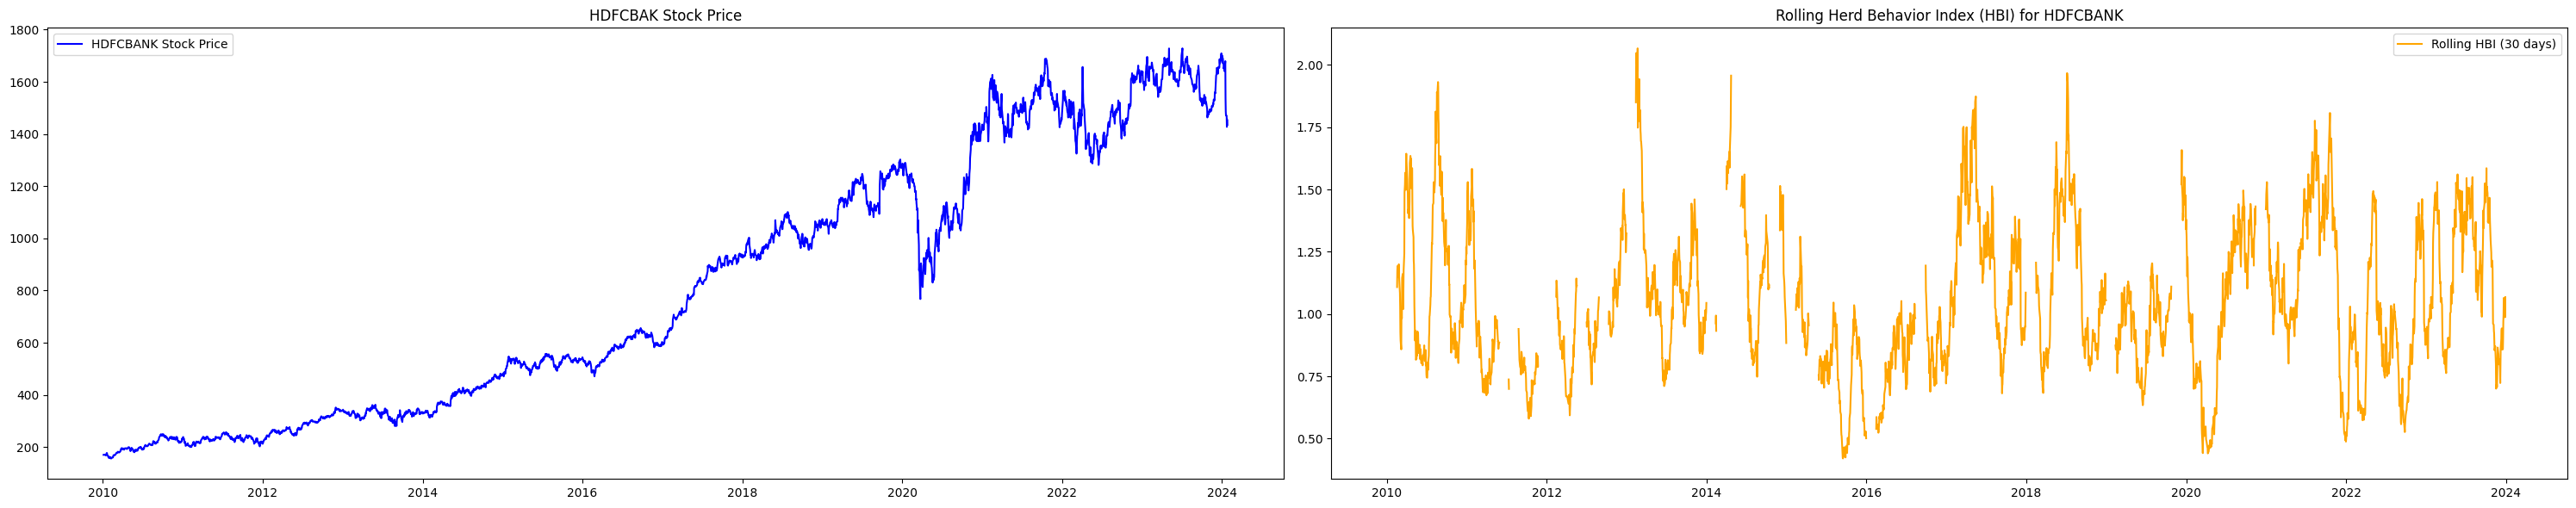

In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Download ASML.AS and ^AEX data
asml = yf.download("HDFCBANK.NS", start='2010-01-01', end='2024-01-29')
aex = yf.download('^NSEI', start='2010-01-01', end='2024-01-29')

# Calculate daily returns
asml_returns = asml['Close'].pct_change().dropna()
aex_returns = aex['Close'].pct_change().dropna()

# Define the rolling window size
window_size = 30

# Calculate the rolling HBI
rolling_hbi = (np.abs(asml_returns - aex_returns).rolling(window_size).mean() /
               np.abs(aex_returns).rolling(window_size).mean())

# Plot ASML.AS stock price and rolling HBI
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 6), sharex=True)

ax1.plot(asml['Close'], label='HDFCBANK Stock Price', color='blue')
ax1.set_title('HDFCBAK Stock Price')
ax1.legend()

ax2.plot(rolling_hbi, label='Rolling HBI (30 days)', color='orange')
ax2.set_title('Rolling Herd Behavior Index (HBI) for HDFCBANK')
ax2.legend()

plt.tight_layout()
plt.show()

Comparative Analysis of HDFCBANK Stock Price and its Rolling Herd Behavior Index (HBI) from 2010 to 2024: The HBI measures the extent to which HDFCBANK’s daily returns deviate from the NIFTY market’s average returns over a rolling 30-day window. Lower HBI values suggest that HDFCBANK’s returns are more closely aligned with the market, potentially indicative of stronger herding behavior. Higher HBI values indicate less conformity with the market’s movements.

## Cross-Sectional Absolute Deviation (CSAD)
While HBI focuses on the deviation of an individual stock’s return from the market average, CSAD offers a perspective on herding behavior by examining the dispersion of returns across a portfolio of stocks. The logic behind CSAD is intuitive: during periods of herding, the returns of individual stocks tend to converge towards the market return, resulting in a low CSAD value. In contrast, during periods of non-herding or independent decision-making, the returns are more dispersed, leading to a higher CSAD.

**From an interpretation standpoint:**

- Low CSAD: Indicates that individual stocks are moving more in tandem with the market average. This could suggest herding behavior among the investors, where they are collectively bullish or bearish, making stock returns converge.
- High CSAD: Signifies greater dispersion in the stock returns compared to the market average. This might point towards independent decision-making by investors and lesser herding.

[*********************100%%**********************]  11 of 11 completed
/tmp/ipykernel_20442/4277175741.py:13: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = data.pct_change().dropna()


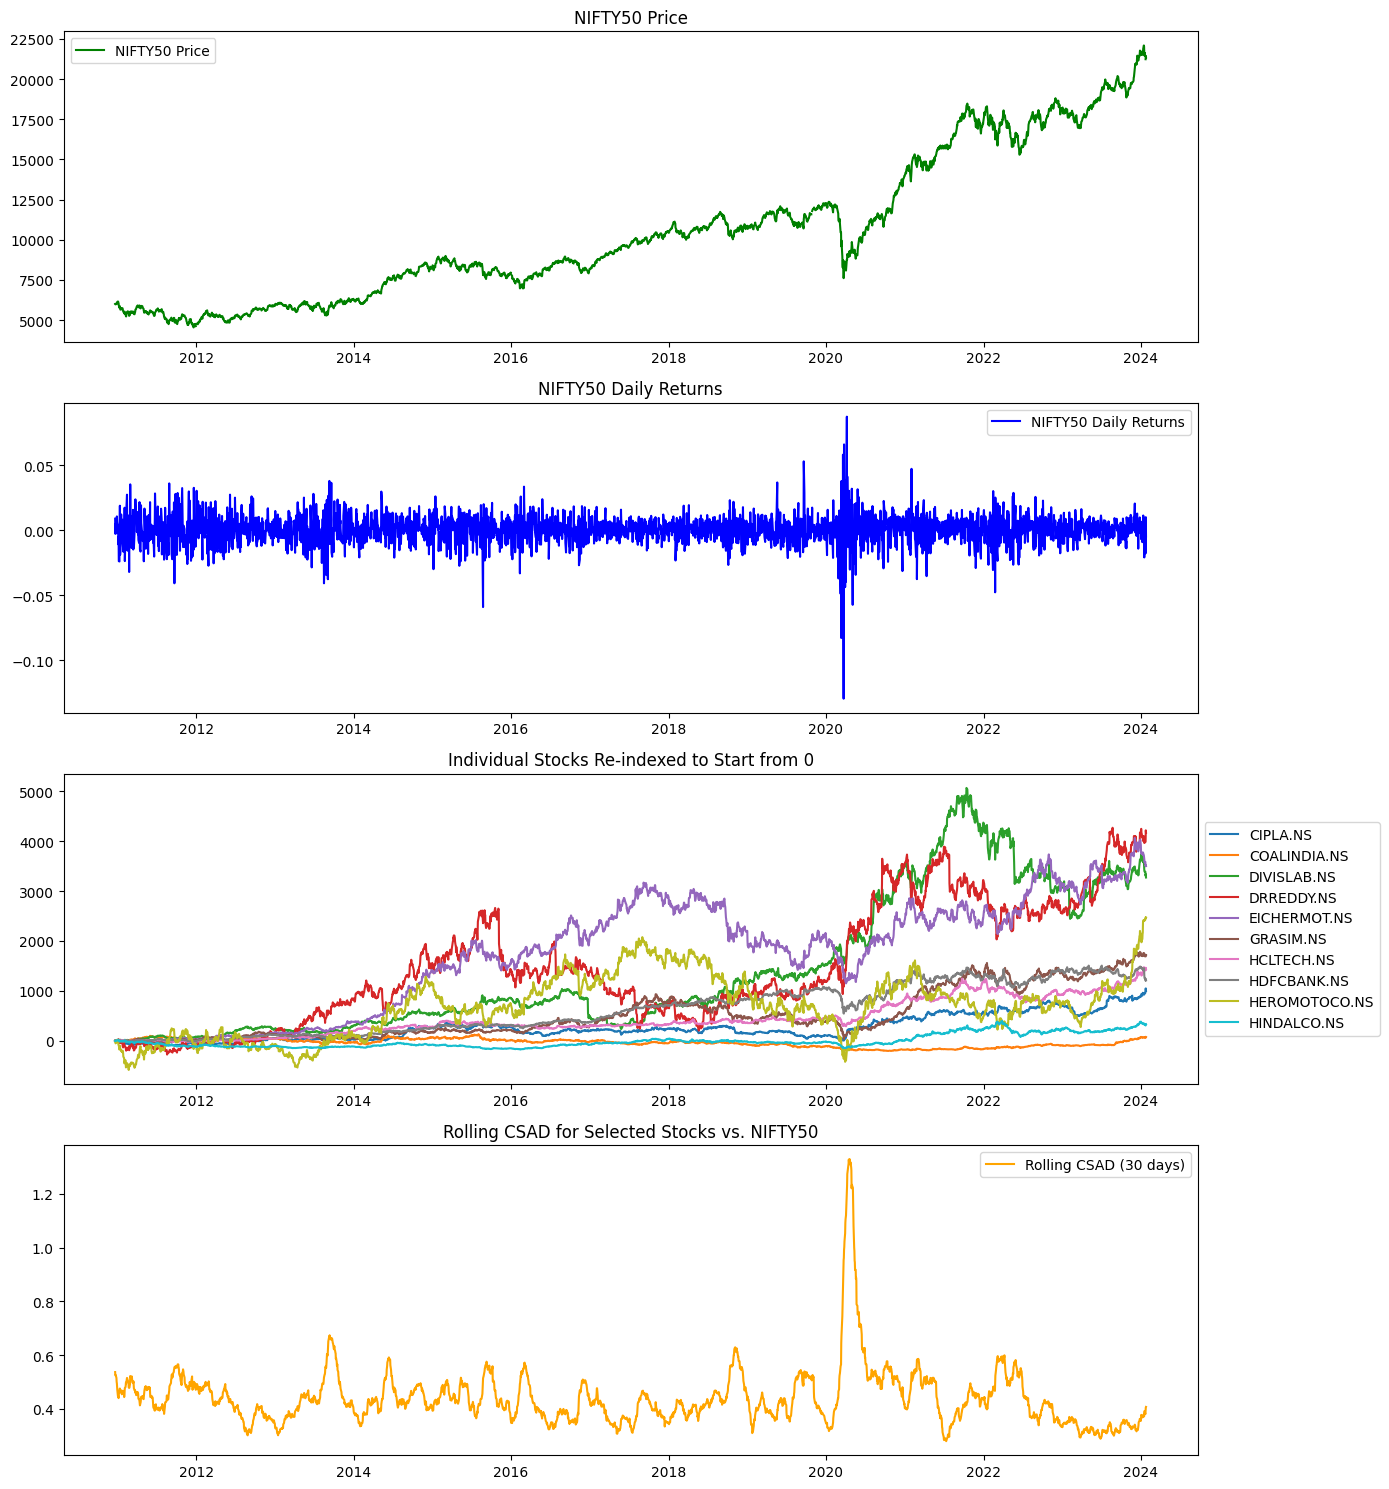

In [11]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Extended list of tech stocks along with S&P 500
tickers = ["CIPLA.NS","COALINDIA.NS","DIVISLAB.NS","DRREDDY.NS","EICHERMOT.NS","GRASIM.NS","HCLTECH.NS","HDFCBANK.NS","HEROMOTOCO.NS","HINDALCO.NS","^NSEI"]

 
data = yf.download(tickers, start='2000-01-01', end='2024-01-29')['Close']

# Calculate daily returns
returns = data.pct_change().dropna()

# Define rolling window size
window_size = 30

def rolling_csad(stock_returns, market_returns, window):
    csad_values = []
    for i in range(len(stock_returns) - window + 1):
        window_data = stock_returns.iloc[i:i+window]
        window_market = market_returns[i:i+window].mean()
        N = len(window_data.columns)
        csad = (N / (N - 1)) * np.sum(np.abs(window_data.sub(window_market, axis=0)).mean(axis=1))
        csad_values.append(csad)
    return pd.Series(csad_values, index=stock_returns.index[window-1:])

# Calculate rolling CSAD for selected stocks compared to S&P 500
rolling_csad_values = rolling_csad(returns[tickers[:-1]], returns["^NSEI"], window_size)

# Align the data dates with rolling_csad_values dates
aligned_data = data.loc[rolling_csad_values.index]

# Re-index stocks to start from 0
aligned_data_zeroed = aligned_data.sub(aligned_data.iloc[0])

# Plotting
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(14, 15))

# Plot S&P 500 price
ax1.plot(aligned_data["^NSEI"], label='NIFTY50 Price', color='green')
ax1.set_title('NIFTY50 Price')
ax1.legend()

# Plot S&P 500 returns
ax2.plot(returns.loc[rolling_csad_values.index, "^NSEI"], label='NIFTY50 Daily Returns', color='blue')
ax2.set_title('NIFTY50 Daily Returns')
ax2.legend()

# Plot re-indexed stocks
for ticker in tickers[:-1]: # we exclude ^GSPC
    ax3.plot(aligned_data_zeroed[ticker], label=ticker)
ax3.set_title('Individual Stocks Re-indexed to Start from 0')
ax3.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Plot Rolling CSAD
ax4.plot(rolling_csad_values, label='Rolling CSAD (30 days)', color='orange')
ax4.set_title('Rolling CSAD for Selected Stocks vs. NIFTY50')
ax4.legend()

plt.tight_layout()
plt.show()

[*********************100%%**********************]  16 of 16 completed


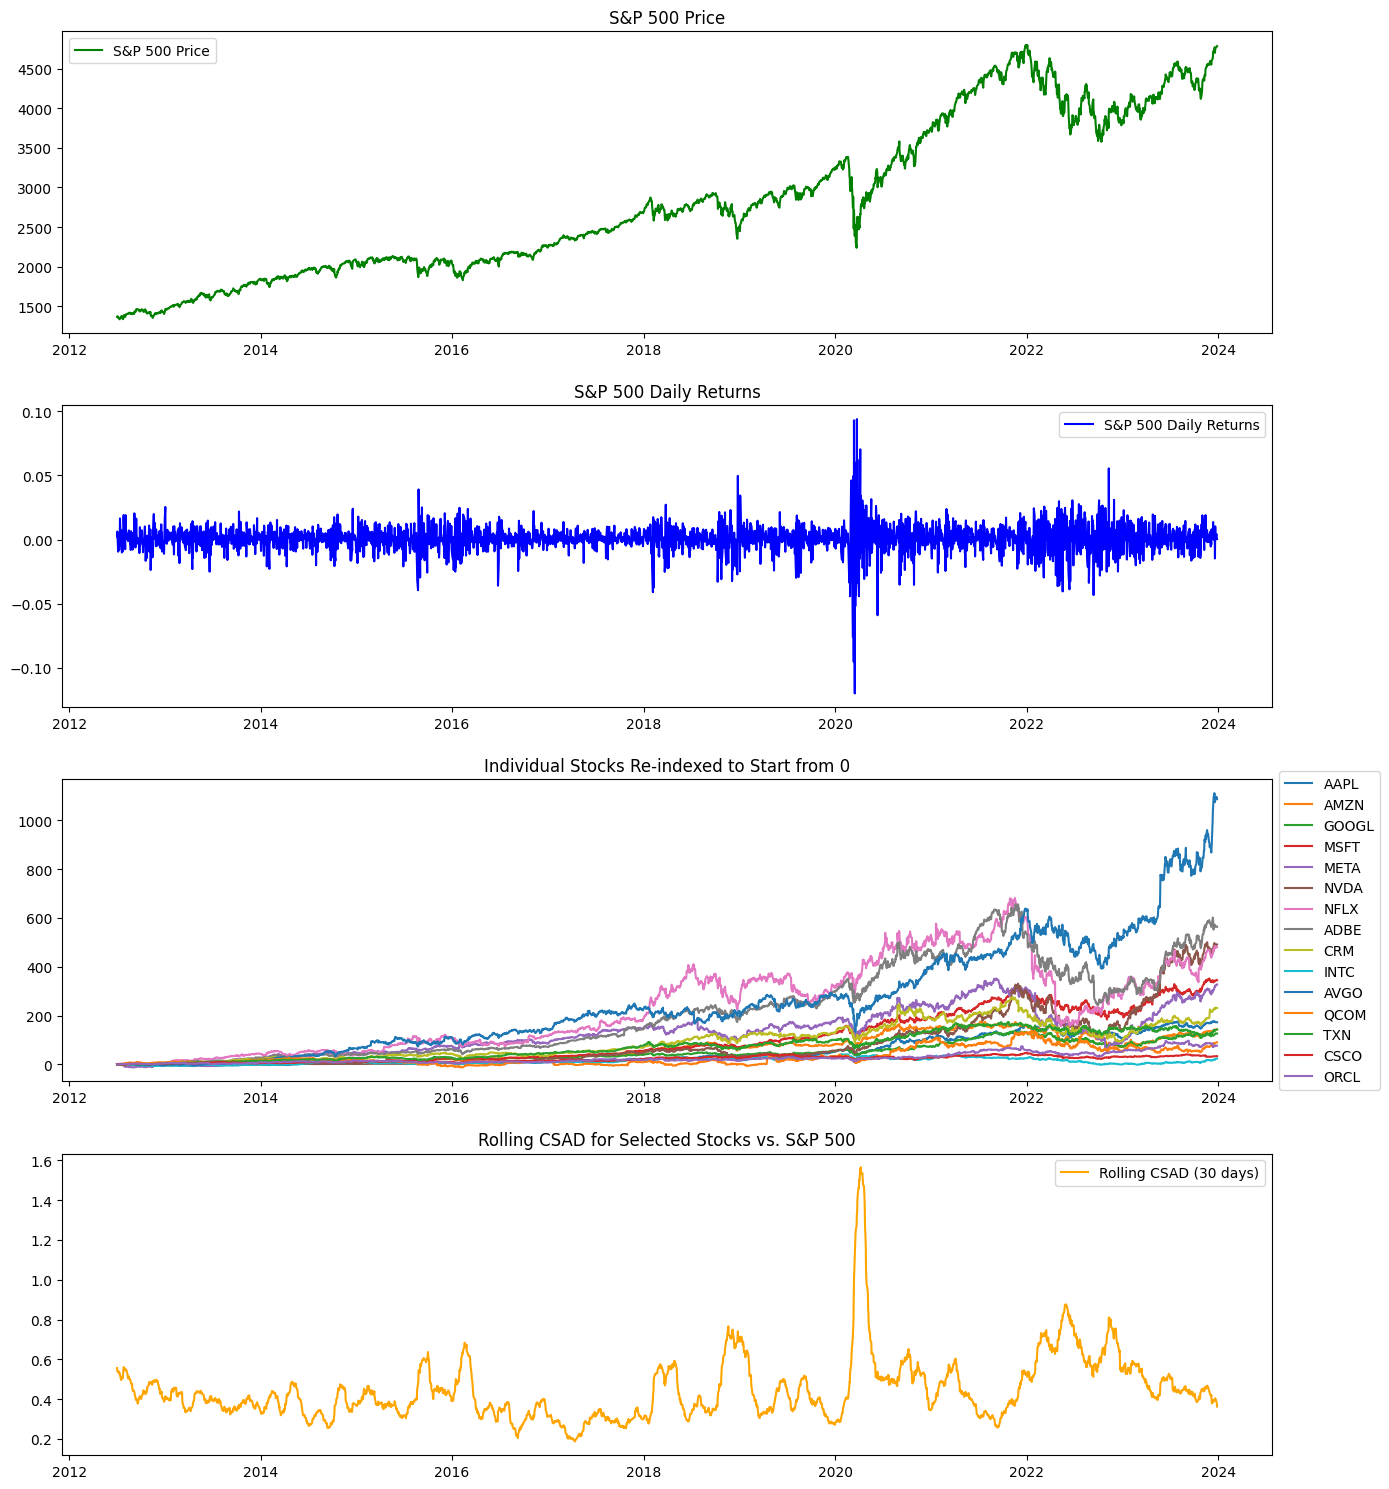

In [9]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Extended list of tech stocks along with S&P 500
tickers = ["AAPL", "AMZN", "GOOGL", "MSFT", "META", "NVDA", "NFLX", "ADBE", "CRM",
           "INTC", "AVGO", "QCOM", "TXN", "CSCO", "ORCL", "^GSPC"]
data = yf.download(tickers, start='2000-01-01', end='2023-12-29')['Close']

# Calculate daily returns
returns = data.pct_change().dropna()

# Define rolling window size
window_size = 30

def rolling_csad(stock_returns, market_returns, window):
    csad_values = []
    for i in range(len(stock_returns) - window + 1):
        window_data = stock_returns.iloc[i:i+window]
        window_market = market_returns[i:i+window].mean()
        N = len(window_data.columns)
        csad = (N / (N - 1)) * np.sum(np.abs(window_data.sub(window_market, axis=0)).mean(axis=1))
        csad_values.append(csad)
    return pd.Series(csad_values, index=stock_returns.index[window-1:])

# Calculate rolling CSAD for selected stocks compared to S&P 500
rolling_csad_values = rolling_csad(returns[tickers[:-1]], returns["^GSPC"], window_size)

# Align the data dates with rolling_csad_values dates
aligned_data = data.loc[rolling_csad_values.index]

# Re-index stocks to start from 0
aligned_data_zeroed = aligned_data.sub(aligned_data.iloc[0])

# Plotting
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(14, 15))

# Plot S&P 500 price
ax1.plot(aligned_data["^GSPC"], label='S&P 500 Price', color='green')
ax1.set_title('S&P 500 Price')
ax1.legend()

# Plot S&P 500 returns
ax2.plot(returns.loc[rolling_csad_values.index, "^GSPC"], label='S&P 500 Daily Returns', color='blue')
ax2.set_title('S&P 500 Daily Returns')
ax2.legend()

# Plot re-indexed stocks
for ticker in tickers[:-1]: # we exclude ^GSPC
    ax3.plot(aligned_data_zeroed[ticker], label=ticker)
ax3.set_title('Individual Stocks Re-indexed to Start from 0')
ax3.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Plot Rolling CSAD
ax4.plot(rolling_csad_values, label='Rolling CSAD (30 days)', color='orange')
ax4.set_title('Rolling CSAD for Selected Stocks vs. S&P 500')
ax4.legend()

plt.tight_layout()
plt.show()

This visualization captures the relationship between key tech stocks and the S&P 500 from 2000 to 2023. We observe the S&P 500’s price trajectory, its daily returns, the relative growth of individual tech stocks when re-indexed from a base point, and the Rolling CSAD — a measure indicating the average deviation of tech stocks from the broader market. Peaks in the CSAD suggest periods where tech stocks diverged significantly from general market trends. The spike in the Rolling CSAD during the strong decrease in the S&P 500 in 2020 indicates that during this period, the tech stocks, on average, didn’t simply follow the general trend of the market but rather displayed a significant deviation from it. In the context of 2020, this observation isn’t entirely surprising. The tech sector was, in many ways, more resilient during the pandemic than other sectors. Tech companies benefited from the accelerated digital transformation as remote work, online shopping, cloud computing, and streaming services became even more integral to everyday life.

## 2.3 Rolling Quantile Regression

Regression analysis is a foundational technique in statistics and finance, and it’s used to establish relationships between variables. Traditional linear regression provides estimates based on mean relationships. However, in financial data analysis, the “average” behavior might not always capture the intricacies of asset dynamics, especially during extreme market conditions. This is where Quantile Regression comes in, offering insights into the relationships at specific quantiles (like the 10th, 50th, and 90th percentiles), not just the average.

When combined with a rolling window approach, it allows for the dynamic observation of these relationships over time, which can be particularly informative for understanding how asset relationships evolve, especially during market extremes.

- At the 10th quantile, we observe how the market influences the stock during its worst 10% of return days.
- At the 50th quantile, the model examines the median relationship.
- At the 90th quantile, the focus is on the best 10% of return days.

[*********************100%%**********************]  2 of 2 completed


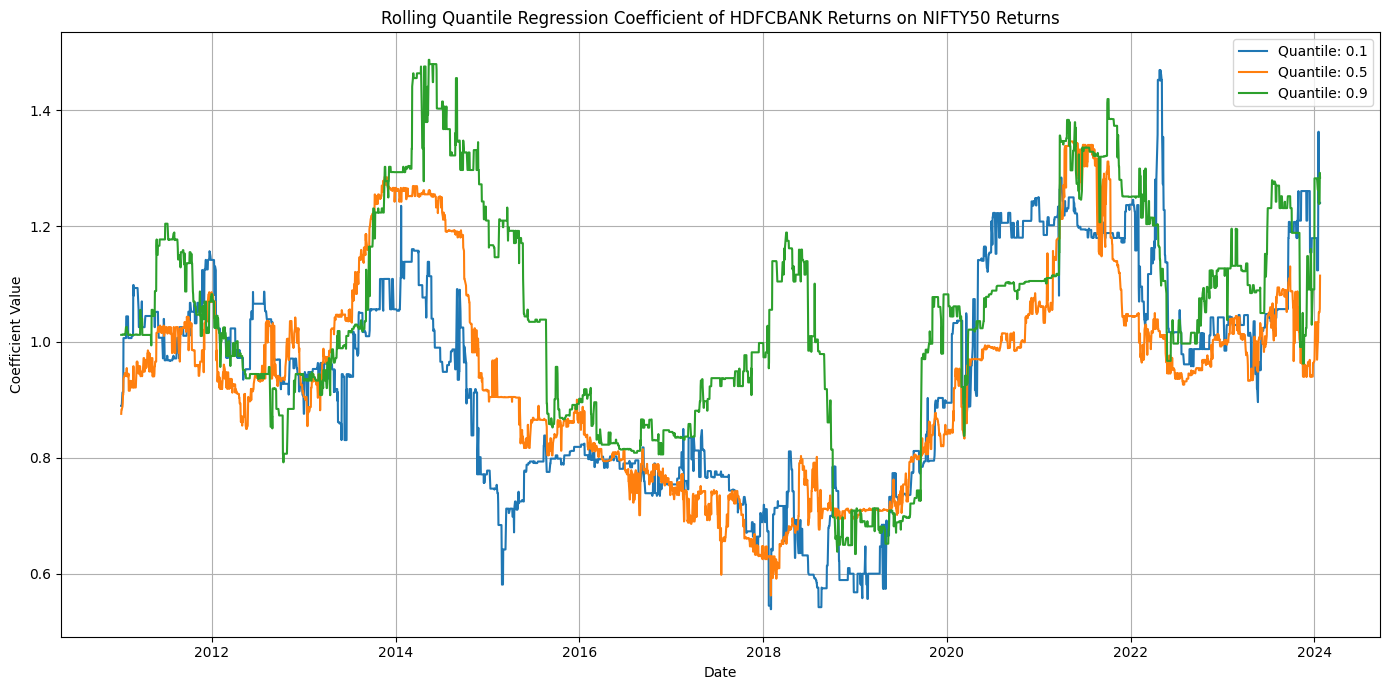

In [12]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

# Download data for a selected stock and S&P 500
tickers = ["HDFCBANK.NS", "^NSEI"]
data = yf.download(tickers, start='2010-01-01', end='2024-01-29')['Close']

# Calculate daily returns
returns = data.pct_change().dropna()

# Create a DataFrame for regression
df = returns.copy()
df.columns = ['HDFCBANK', 'NIFTY50']

# Define quantiles and rolling window
quantiles = [0.1, 0.5, 0.9]
window = 252  # Roughly one year of trading days

# Store rolling regression results
rolling_params = {quantile: {"Intercept": [], "NIFTY50": []} for quantile in quantiles}

for start in range(0, len(df) - window):
    window_data = df.iloc[start:start + window]
    for quantile in quantiles:
        mod = smf.quantreg('HDFCBANK ~ NIFTY50', window_data)
        res = mod.fit(q=quantile)
        rolling_params[quantile]["Intercept"].append(res.params["Intercept"])
        rolling_params[quantile]["NIFTY50"].append(res.params["NIFTY50"])

# Convert results to DataFrames for plotting
rolling_index = df.index[window - 1:-1]  # Adjusted to match the correct length
rolling_dfs = {quantile: pd.DataFrame(data, index=rolling_index) for quantile, data in rolling_params.items()}

# Plotting
plt.figure(figsize=(14, 7))
for quantile in quantiles:
    plt.plot(rolling_dfs[quantile]["NIFTY50"], label=f'Quantile: {quantile}')

plt.title('Rolling Quantile Regression Coefficient of HDFCBANK Returns on NIFTY50 Returns')
plt.xlabel('Date')
plt.ylabel('Coefficient Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### Evolution of Rolling Quantile Regression Coefficients for HDFCBANK Returns Against NIFTY50 Returns. 
- The graph presents rolling regression coefficients across different quantiles (0.1, 0.5, 0.9) over time. As observed, the coefficient fluctuates, providing insights into HDFCBANK’s relative sensitivity to the NIFTY50’s movements at various quantiles. Peaks and troughs in each quantile line might suggest periods when HDFCBANK stock showed higher or lower sensitivity to market-wide shifts at that specific quantile. 

- The median (0.5) quantile offers the most straightforward relationship, while the 0.1 and 0.9 quantiles give insights into HDFCBANK’s behavior during more extreme market movements.

**By visualizing the rolling coefficients of the regression:**

- If we see that the coefficient at a lower quantile (e.g., 0.1) becomes more negative over time, it might indicate that the stock is increasingly sensitive to market downturns.
- A stable coefficient at the median (0.5) might suggest a consistent median relationship between the stock and the market.
- Observing the coefficient at the upper quantile (e.g., 0.9) can give insights into the stock’s performance during exceptionally good market days.

## 2.4 Rolling Network Analysis
One way to visually detect herding among a set of stocks is to explore their correlation patterns over time. While correlation matrices provide a quantitative perspective, network analysis gives an intuitive graphical representation of these inter-stock relationships, offering insights into potential herding dynamics.

The methodology implemented here is the following:

1.Fetch the daily closing prices for a selected list of stocks over a specific timeframe.
2.For each year, compute a correlation matrix. This matrix represents pairwise correlation coefficients between the stocks’ returns.
3.Graph Construction:
- Nodes: Each stock in the portfolio becomes a node in the graph.
- Edges: A pairwise correlation that exceeds a predefined threshold leads to an edge between the two corresponding stock nodes. The edge’s thickness can be proportional to the correlation’s magnitude.
4. Arrange the stocks (nodes) in a layout that reflects their correlations. Stocks that are highly correlated are closer together, while those with weaker correlations are farther apart.

In [14]:
!pip install networkx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 802.2 kB/s eta 0:00:00m eta 0:00:010:01:01


[*********************100%%**********************]  48 of 48 completed


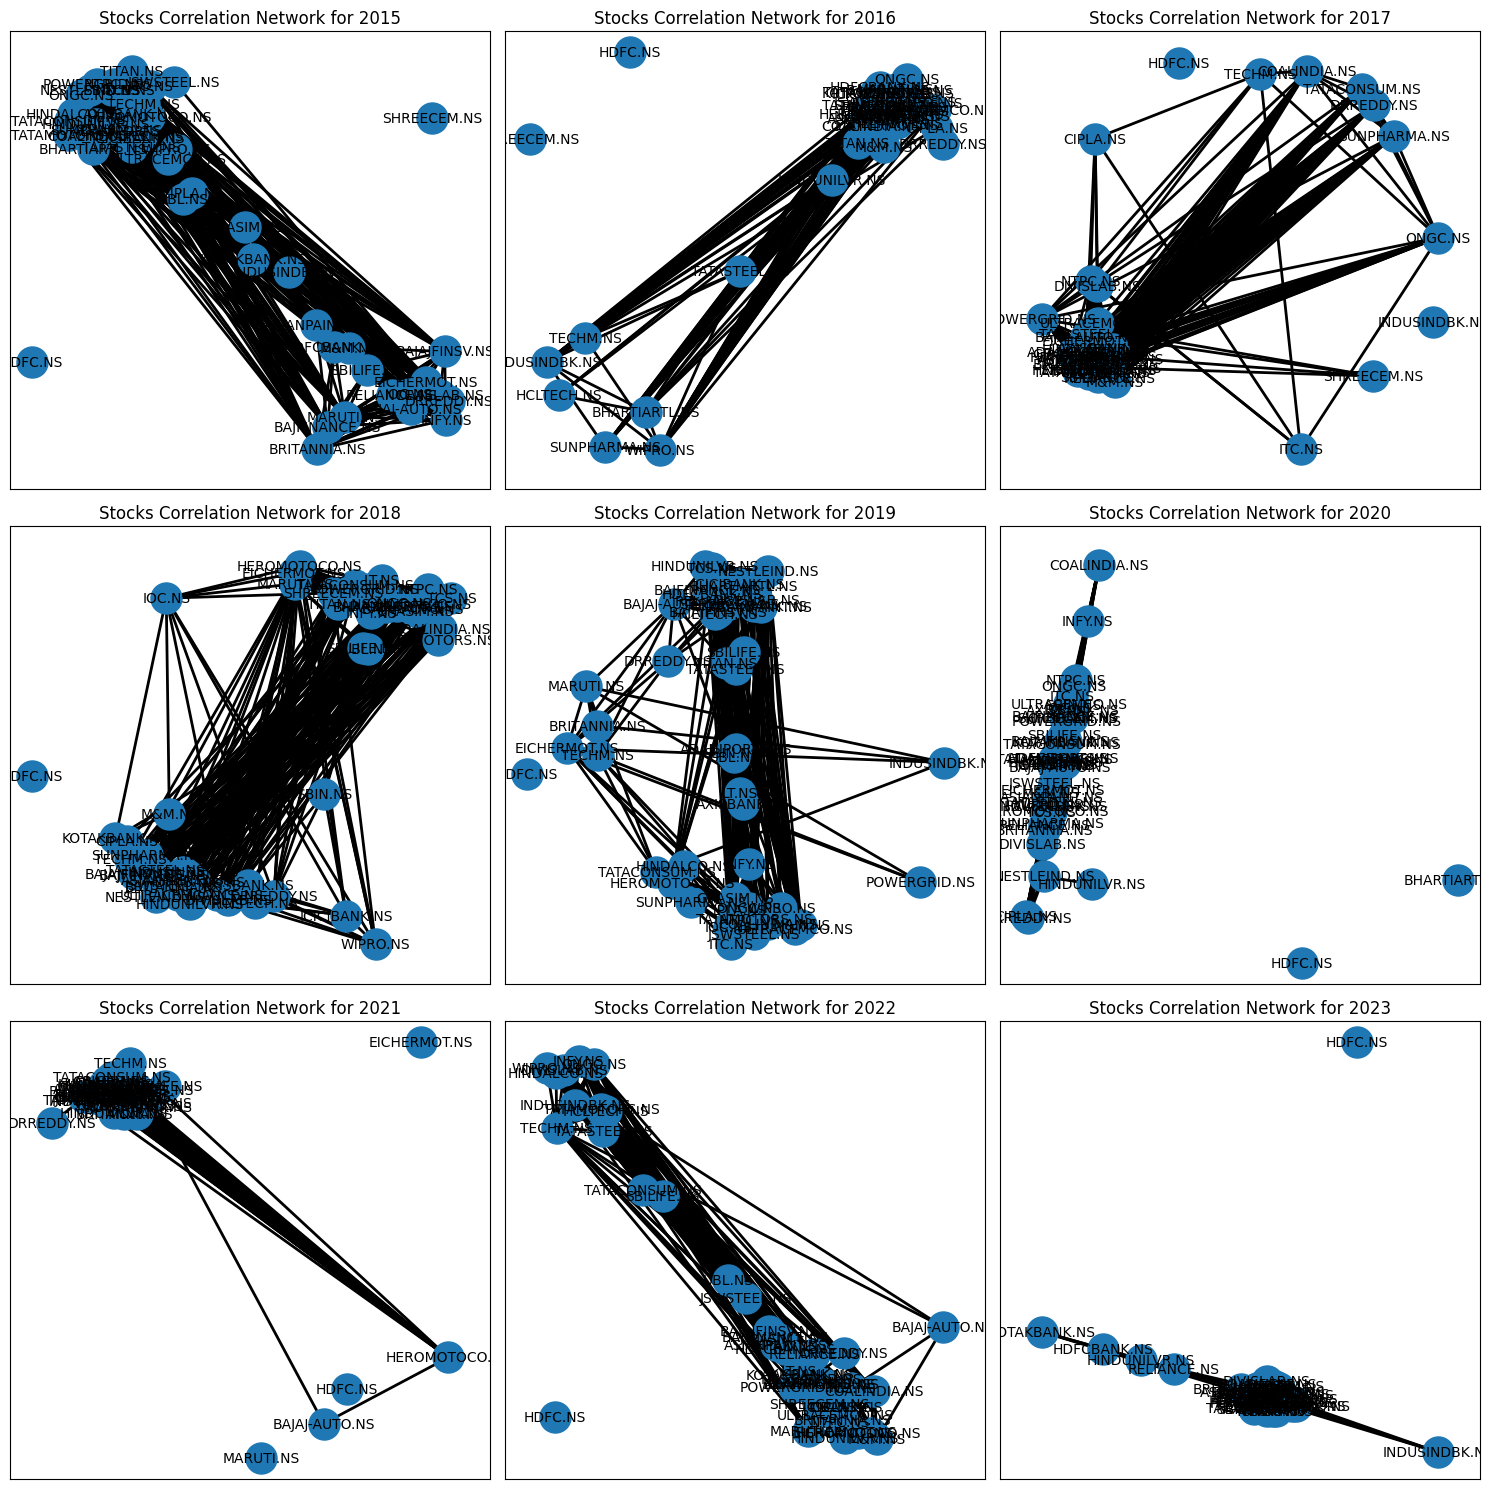

In [40]:
import yfinance as yf
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Define the tickers and fetch the data
tickers = [
    "ADANIPORTS.NS", "ASIANPAINT.NS", "AXISBANK.NS", "BAJAJ-AUTO.NS", "BAJFINANCE.NS",
    "BAJAJFINSV.NS", "BHARTIARTL.NS", "BRITANNIA.NS", "CIPLA.NS", "COALINDIA.NS",
    "DIVISLAB.NS", "DRREDDY.NS", "EICHERMOT.NS", "GRASIM.NS", "HCLTECH.NS", "HDFC.NS",
    "HDFCBANK.NS", "HEROMOTOCO.NS", "HINDALCO.NS", "HINDUNILVR.NS", "ICICIBANK.NS",
    "IOC.NS", "INDUSINDBK.NS", "INFY.NS", "ITC.NS", "JSWSTEEL.NS", "KOTAKBANK.NS",
    "LT.NS", "M&M.NS", "MARUTI.NS", "NESTLEIND.NS", "NTPC.NS", "ONGC.NS", "POWERGRID.NS",
    "RELIANCE.NS", "SHREECEM.NS", "SBIN.NS", "SBILIFE.NS", "SUNPHARMA.NS", "TCS.NS",
    "TATACONSUM.NS", "TATAMOTORS.NS", "TATASTEEL.NS", "TECHM.NS", "TITAN.NS",
    "ULTRACEMCO.NS", "UBL.NS", "WIPRO.NS"
]
data = yf.download(tickers, start='2015-01-01', end='2024-12-31')['Close']

def plot_network_for_year(data_for_year, ax, year):
    # Calculate correlation for that year
    corr_matrix = data_for_year.corr()

    # Initialize a graph
    G = nx.Graph()

    # Add nodes
    for ticker in tickers:
        G.add_node(ticker)

    # Add edges based on a correlation threshold
    threshold = 0.5
    for i in range(len(tickers)):
        for j in range(i+1, len(tickers)):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                G.add_edge(tickers[i], tickers[j], weight=corr_matrix.iloc[i, j])

    # Draw the graph
    pos = nx.spring_layout(G)  # positions for all nodes
    nx.draw_networkx_nodes(G, pos, node_size=500, ax=ax)
    nx.draw_networkx_edges(G, pos, width=2, ax=ax)
    nx.draw_networkx_labels(G, pos, font_size=10, font_family="sans-serif", ax=ax)
    ax.set_title(f'Stocks Correlation Network for {year}')

# Set up the figure with 9 subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

for i, year in enumerate(range(2015, 2024)):
    ax = axes[i//3, i%3]
    # Filter data for the specific year
    data_for_year = data[data.index.year == year]
    plot_network_for_year(data_for_year, ax, year)

plt.tight_layout()
plt.show()


Evolution of Rolling Quantile Regression Coefficients for AAPL Returns Against S&P 500 Returns. The graph presents rolling regression coefficients across different quantiles (0.1, 0.5, 0.9) over time. As observed, the coefficient fluctuates, providing insights into AAPL’s relative sensitivity to the S&P 500’s movements at various quantiles. Peaks and troughs in each quantile line might suggest periods when AAPL stock showed higher or lower sensitivity to market-wide shifts at that specific quantile. The median (0.5) quantile offers the most straightforward relationship, while the 0.1 and 0.9 quantiles give insights into AAPL’s behavior during more extreme market movements.

**Interpretation in the Context of Herding:**

- Clusters: Tight clusters of nodes suggest that these stocks are moving together due to herding behavior. This could be because investors are collectively reacting to similar news, information, or sentiments about those stocks or their associated sectors.
- Isolated Nodes: Stocks that stand apart from major clusters might be unaffected by the prevailing herding trends in the market. They might be driven by company-specific factors or might represent sectors where investors are acting more independently.
- Inter-cluster Edges: Strong correlations between stocks from different sectors (inter-cluster edges) can suggest macro-level herding, where broad market sentiments or global events are driving collective investor behavior.